In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('C:\\Users\\Souvik\\Desktop\\Py\\Project\\Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
df1=df.drop(df[['availability','society']],axis='columns')
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
df1.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
df2=df1.dropna()
df2.shape

(12710, 7)

In [8]:
df2.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [9]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [10]:
df2.drop(df2.query('size== "43 Bedroom"').index,inplace=True)

C:\Users\Souvik\AppData\Local\Temp\ipykernel_7784\1902689099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2.query('size== "43 Bedroom"').index,inplace=True)


In [11]:
df2['bedroom']=df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

C:\Users\Souvik\AppData\Local\Temp\ipykernel_7784\3247640215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bedroom']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


,area_type,location,size,total_sqft,bath,balcony,price,bedroom
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [12]:
df2.shape

(12709, 8)

In [13]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def conversion_to_sqft(x):
    t=x.split('-')
    if len(t)==2:
        return ((float(t[0])+float(t[1]))/2)
    try:
        return float(x)
    except:
        return None

In [15]:
conversion_to_sqft('45.4sq. ft')

In [16]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(conversion_to_sqft)
df3

,area_type,location,size,total_sqft,bath,balcony,price,bedroom
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4


In [17]:
df3['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [18]:
df4=df3.copy()
df4['price_per_sqft']=(df4['price']*100000)/df4['total_sqft']
df4.head()

,area_type,location,size,total_sqft,bath,balcony,price,bedroom,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [19]:
len(df4.location.unique())

1265

In [20]:
df5=df4.copy()

In [21]:
location_counts = df5['location'].value_counts()
df5['location'] = df5['location'].apply(lambda x: 'other' if location_counts[x] <= 10 else x)
df5

,area_type,location,size,total_sqft,bath,balcony,price,bedroom,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [22]:
df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
other               2754
Whitefield           514
Sarjapur  Road       372
Electronic City      300
Kanakpura Road       261
                    ... 
Karuna Nagar          11
Narayanapura          11
Tindlu                11
Thyagaraja Nagar      11
ISRO Layout           11
Name: location, Length: 238, dtype: int64

In [23]:
len(df5.location.unique())

238

In [24]:
df6=df5.copy()
df6

,area_type,location,size,total_sqft,bath,balcony,price,bedroom,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


# we assume the followings:
    1. bath < bedroom + 2
    2. min total_sqft threshold for a 1 bedroom = 300 sq. ft.


In [25]:
df7=df6[~(df6.bath>df6['bedroom']+2)]
df7.shape

(12701, 9)

In [26]:
df8=df7[~((df7.total_sqft/df7.bedroom)<300)]
df8.shape

(12050, 9)

In [27]:
df8.price_per_sqft.describe()

count     12008.000000
mean       6202.549462
std        3976.232485
min         267.829813
25%        4199.324665
50%        5252.281613
75%        6822.065096
max      176470.588235
Name: price_per_sqft, dtype: float64

In [28]:
def remv_outl(df):
    df_out=pd.DataFrame()
    for k, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        stdv=np.std(subdf.price_per_sqft)
        rem_df=subdf[((subdf.price_per_sqft)>(m-stdv)) & ((subdf.price_per_sqft)<(m+stdv))]
        df_out=pd.concat([df_out,rem_df],ignore_index=True)
    return df_out

In [29]:
df9=remv_outl(df8)
df9.shape

(9846, 9)

In [30]:
df_sct=df9.copy()
df_sct.shape

(9846, 9)

In [31]:
df9.location.unique()

array([' Devarachikkanahalli', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [32]:
def plot_scatter(df, loca):
    if loca not in df.location.values:
        print(f"Location '{loca}' not found in DataFrame.")
        return
    
    g = df[df['location'] == loca]
    match_df = g[g.duplicated(subset=['bath', 'balcony'], keep=False)]
    
    if len(match_df) == 0:
        print(f"No matching rows found for location '{loca}' based on 'bath' and 'balcony'.")
        return
    print(match_df)
    print(f'Datapoints: ',len(match_df))
    grouped = match_df.groupby('bedroom')
    
    # Plot scatter plot for each bedroom type
    for bedroom, group in grouped:
        plt.scatter(group.total_sqft, group.price, label=f'Bedrooms: {bedroom}')
    
    plt.legend()
    plt.xlabel('Total Sqft')
    plt.ylabel('Price')
    plt.title(f'Scatter Plot for Location {loca}')
    plt.show()


                 area_type location   size  total_sqft  bath  balcony  price  \
2646  Super built-up  Area   Hebbal  3 BHK      1760.0   2.0      2.0  123.0   
2648  Super built-up  Area   Hebbal  3 BHK      1900.0   3.0      2.0  119.0   
2649  Super built-up  Area   Hebbal  2 BHK      1349.0   2.0      1.0   98.2   
2650  Super built-up  Area   Hebbal  4 BHK      2483.0   5.0      2.0  212.0   
2651  Super built-up  Area   Hebbal  3 BHK      1760.0   2.0      2.0  130.0   
...                    ...      ...    ...         ...   ...      ...    ...   
2766  Super built-up  Area   Hebbal  3 BHK      1740.0   2.0      1.0  137.0   
2767  Super built-up  Area   Hebbal  3 BHK      1430.0   3.0      1.0   85.0   
2768  Super built-up  Area   Hebbal  3 BHK      1662.0   3.0      2.0  155.0   
2769  Super built-up  Area   Hebbal  2 BHK      1349.0   2.0      1.0   98.0   
2771  Super built-up  Area   Hebbal  2 BHK      1349.0   2.0      1.0   96.8   

      bedroom  price_per_sqft  
2646   

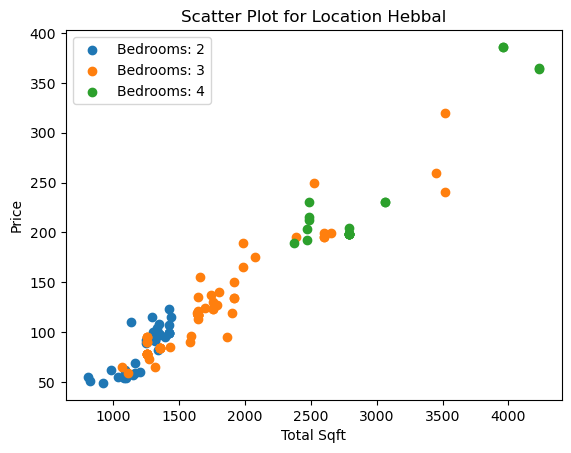

In [33]:
plot_scatter(df_sct,'Hebbal')

In [34]:
len(df_sct[df_sct.location== 'Hebbal'])

126

In [35]:
def remv_bedroom_outl(df):
    outlier_indices=np.array([])
    for location, location_df in df.groupby('location'):
        stat_dic={}
        for bhk,bhk_df in location_df.groupby('bedroom'):
            stat_dic[bhk]={
                'mean_val': np.mean(bhk_df.price_per_sqft),
                'count_val': len(bhk_df)
            }
        for bhk,bhk_df in location_df.groupby('bedroom'):
            stats=stat_dic.get(bhk-1)
            if stats and bhk != 1 and stats['count_val']>=10:
                outlier_indices=np.append(outlier_indices,bhk_df[bhk_df.price_per_sqft<stats['mean_val']].index.values)
    return df.drop(outlier_indices,axis=0)   

In [36]:
df10=remv_bedroom_outl(df9)
df10.shape

(7259, 9)

                 area_type location   size  total_sqft  bath  balcony  price  \
2646  Super built-up  Area   Hebbal  3 BHK      1760.0   2.0      2.0  123.0   
2649  Super built-up  Area   Hebbal  2 BHK      1349.0   2.0      1.0   98.2   
2650  Super built-up  Area   Hebbal  4 BHK      2483.0   5.0      2.0  212.0   
2651  Super built-up  Area   Hebbal  3 BHK      1760.0   2.0      2.0  130.0   
2652  Super built-up  Area   Hebbal  3 BHK      3450.0   5.0      2.0  260.0   
...                    ...      ...    ...         ...   ...      ...    ...   
2765        Built-up  Area   Hebbal  2 BHK      1150.0   2.0      1.0   57.0   
2766  Super built-up  Area   Hebbal  3 BHK      1740.0   2.0      1.0  137.0   
2768  Super built-up  Area   Hebbal  3 BHK      1662.0   3.0      2.0  155.0   
2769  Super built-up  Area   Hebbal  2 BHK      1349.0   2.0      1.0   98.0   
2771  Super built-up  Area   Hebbal  2 BHK      1349.0   2.0      1.0   96.8   

      bedroom  price_per_sqft  
2646   

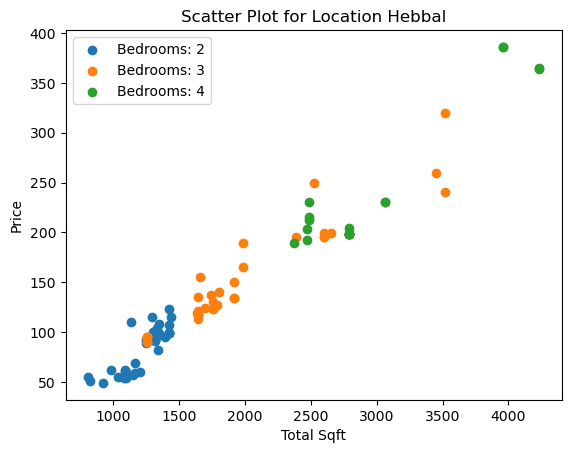

In [37]:
plot_scatter(df10,'Hebbal')

In [38]:
df11=df10.drop(['size','price_per_sqft'],axis='columns')
df11

,area_type,location,total_sqft,bath,balcony,price,bedroom
0,Super built-up Area,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3
1,Super built-up Area,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Plot Area,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Super built-up Area,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,Super built-up Area,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3
...,...,...,...,...,...,...,...
9836,Super built-up Area,other,1155.0,2.0,1.0,64.0,2
9838,Carpet Area,other,1200.0,2.0,3.0,70.0,2
9839,Super built-up Area,other,1800.0,1.0,1.0,200.0,1
9842,Super built-up Area,other,1353.0,2.0,2.0,110.0,2


In [39]:
dummy_area_type= pd.get_dummies(df11.area_type)
dummy_area_type.head()

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,False,False,False,True
1,False,False,False,True
2,False,False,True,False
3,False,False,False,True
4,False,False,False,True


In [40]:
df12=pd.concat([df11,dummy_area_type.drop('Super built-up  Area',axis=1)],axis=1)
df12

,area_type,location,total_sqft,bath,balcony,price,bedroom,Built-up Area,Carpet Area,Plot Area
0,Super built-up Area,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,False,False,False
1,Super built-up Area,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,False,False,False
2,Plot Area,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,False,False,True
3,Super built-up Area,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,False,False,False
4,Super built-up Area,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,False,False,False
...,...,...,...,...,...,...,...,...,...,...
9836,Super built-up Area,other,1155.0,2.0,1.0,64.0,2,False,False,False
9838,Carpet Area,other,1200.0,2.0,3.0,70.0,2,False,True,False
9839,Super built-up Area,other,1800.0,1.0,1.0,200.0,1,False,False,False
9842,Super built-up Area,other,1353.0,2.0,2.0,110.0,2,False,False,False


In [41]:
df12.drop('area_type',axis=1,inplace=True)
df12.head()

,location,total_sqft,bath,balcony,price,bedroom,Built-up Area,Carpet Area,Plot Area
0,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,False,False,False
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,False,False,False
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,False,False,True
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,False,False,False
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,False,False,False


In [42]:
dummy_location=pd.get_dummies(df12.location)
dummy_location.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
df13=pd.concat([df12,dummy_location.drop('other',axis=1)],axis=1)
df13.head()

,location,total_sqft,bath,balcony,price,bedroom,Built-up Area,Carpet Area,Plot Area,Devarachikkanahalli,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [44]:
df13.drop('location',axis=1,inplace=True)
df13.head()

,total_sqft,bath,balcony,price,bedroom,Built-up Area,Carpet Area,Plot Area,Devarachikkanahalli,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3.0,44.0,3,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1250.0,2.0,2.0,40.0,2,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2.0,83.0,2,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,2.0,40.0,2,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,2.0,65.0,3,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

In [46]:
x=df13.drop('price', axis=1)
x.head()

,total_sqft,bath,balcony,bedroom,Built-up Area,Carpet Area,Plot Area,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3.0,3,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1250.0,2.0,2.0,2,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2.0,2,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,2.0,2,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,2.0,3,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
y=df13.price
y.head()

0    44.0
1    40.0
2    83.0
3    40.0
4    65.0
Name: price, dtype: float64

In [48]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=.10)

In [49]:
lr=LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test,y_test)

0.7915207243098145

In [50]:
def best_model(a,b):
    model_dict={
        'Linear_Regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
                
            }
        },
        'Decision_Tree_Regressor': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"],
                'splitter' : ["best", "random"],
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'max_iter': [None,1000,10000],
                'warm_start': [True, False],
                'selection': ['cyclic', 'random'],
                'positive': [True, False]
            }
        },
        'Ridge':{
            'model': Ridge(),
            'params': {
                'alpha':[1,2],
                'max_iter': [None,15000,20000],
                'solver': ['auto', 'svd', 'cholesky','sparse_cg', 'sag', 'saga', 'lsqr', 'lbfgs'],
                'positive': [True, False]
            }
        }
        
    }
    model_out=pd.DataFrame(columns= ['Model', 'Best Accuracy', 'Best Parameters'])
    cv=ShuffleSplit(n_splits=5,test_size=.15,random_state=42)
    for key, value in model_dict.items():
        gs=GridSearchCV(value['model'],value['params'],cv=cv)
        gs.fit(a,b)
        model_out.loc[len(model_out)]=[key,gs.best_score_,gs.best_params_]
    return model_out

In [54]:
best_model(x,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 1001, in fit
   

KeyboardInterrupt: 

In [52]:
x.columns

Index(['total_sqft', 'bath', 'balcony', 'bedroom', 'Built-up  Area',
       'Carpet  Area', 'Plot  Area', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)